In [8]:
import pandas as pd
data=pd.read_csv('C://Users//Nitin//Downloads//Neural networks//Alphabets_data.csv')
data

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


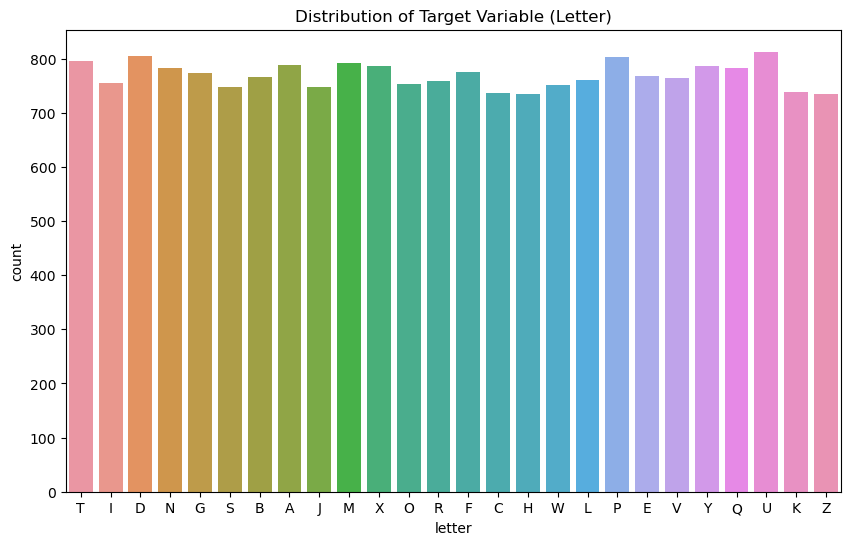

In [9]:
# Plot data distribution for the target variable
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.countplot(x='letter', data=data)
plt.title('Distribution of Target Variable (Letter)')
plt.show()

# Data Preprocessing

In [10]:
from sklearn.preprocessing import StandardScaler
# Data normalization
features = data.columns[1:]  # All columns except 'letter'
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)


Missing values:
 letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64


# 2. Model Implementation
Construct a basic ANN model

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Split the data into training and testing sets
X = data[features]
y = pd.get_dummies(data['letter'])  # One-hot encoding the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construct the ANN model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
y_true = y_test.values.argmax(axis=-1)

accuracy = accuracy_score(y_true, y_pred_classes)
report = classification_report(y_true, y_pred_classes)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


C:\Users\Nitin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3854 - loss: 2.2629 - val_accuracy: 0.7241 - val_loss: 0.9400
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7705 - loss: 0.8019 - val_accuracy: 0.8072 - val_loss: 0.6519
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8271 - loss: 0.5866 - val_accuracy: 0.8572 - val_loss: 0.5262
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8638 - loss: 0.4662 - val_accuracy: 0.8650 - val_loss: 0.4561
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8911 - loss: 0.3880 - val_accuracy: 0.8828 - val_loss: 0.3985
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9018 - loss: 0.3323 - val_accuracy: 0.8972 - val_loss: 0.3374
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9111 - loss: 0.2959 - val_accuracy: 0.9069 - val_loss: 0.3073
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9221 - loss: 0.2541 - val_accuracy: 0.

# 3. Hyperparameter Tuning

In [12]:
pip install keras-tuner


Note: you may need to restart the kernel to use updated packages.


In [13]:
import kerastuner as kt

def build_model(hp):
    model = Sequential()
    model.add(Dense(hp.Int('units', min_value=32, max_value=512, step=32), activation='relu', input_dim=X_train.shape[1]))
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(hp.Int(f'units_{i}', min_value=32, max_value=512, step=32), activation='relu'))
    model.add(Dense(y_train.shape[1], activation='softmax'))
    
    model.compile(optimizer=hp.Choice('optimizer', ['adam', 'rmsprop']),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='hyperparameter_tuning',
    project_name='alphabet_recognition'
)

tuner.search(X_train, y_train, epochs=20, validation_split=0.2)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal number of layers is {best_hps.get('num_layers')}.
The optimizer used is {best_hps.get('optimizer')}.
""")


Reloading Tuner from hyperparameter_tuning\alphabet_recognition\tuner0.json

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 512 and the optimal number of layers is 3.
The optimizer used is rmsprop.



C:\Users\Nitin\AppData\Local\Temp\ipykernel_9020\1936978759.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


# Build and train the model with the best hyperparameters

In [14]:
# Build the model with the optimal hyperparameters and train it
best_model = tuner.hypermodel.build(best_hps)
best_model.fit(X_train, y_train, epochs=20, validation_split=0.2)

# Evaluate the best model
y_pred_best = best_model.predict(X_test)
y_pred_classes_best = y_pred_best.argmax(axis=-1)
y_true = y_test.values.argmax(axis=-1)

accuracy_best = accuracy_score(y_true, y_pred_classes_best)
report_best = classification_report(y_true, y_pred_classes_best)

print(f'Accuracy (best model): {accuracy_best}')
print('Classification Report (best model):')
print(report_best)


C:\Users\Nitin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4299 - loss: 1.9748 - val_accuracy: 0.7825 - val_loss: 0.7423
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8074 - loss: 0.6512 - val_accuracy: 0.8609 - val_loss: 0.4806
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8762 - loss: 0.3959 - val_accuracy: 0.8841 - val_loss: 0.3752
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9061 - loss: 0.2958 - val_accuracy: 0.9000 - val_loss: 0.3192
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9290 - loss: 0.2249 - val_accuracy: 0.9159 - val_loss: 0.2604
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9422 - loss: 0.1892 - val_accuracy: 0.9275 - val_loss: 0.2210
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9514 - loss: 0.1517 - val_accuracy: 0.9369 - val_loss: 0.2041
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9575 - loss: 0.1274 - val_accuracy

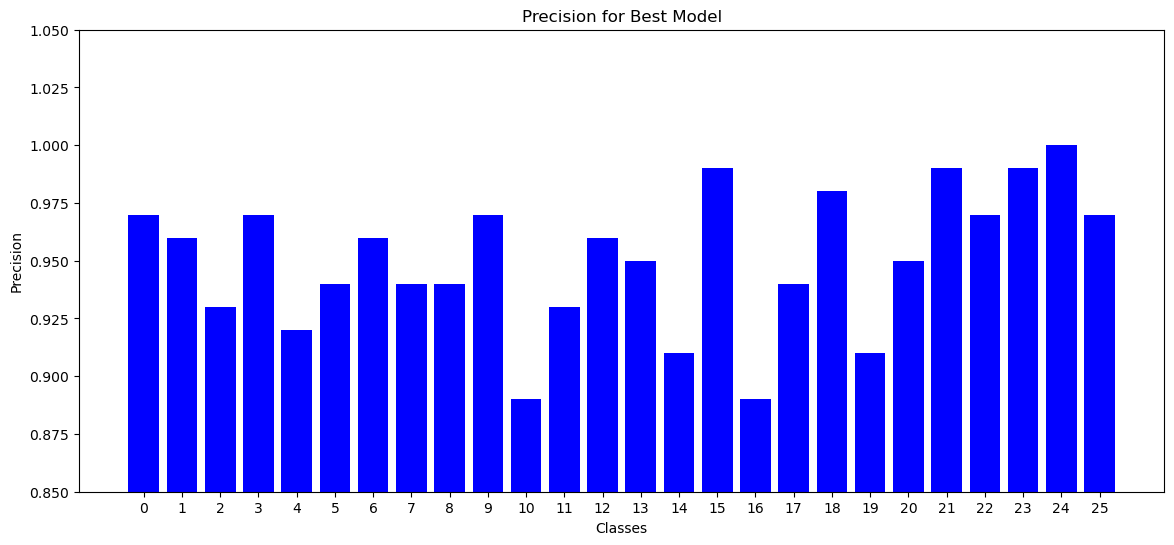

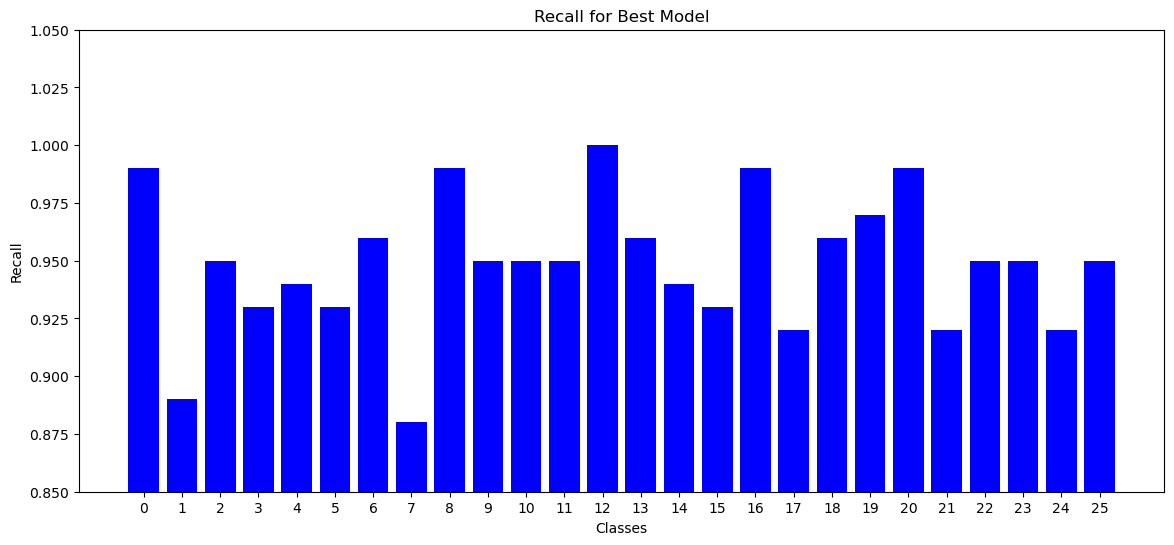

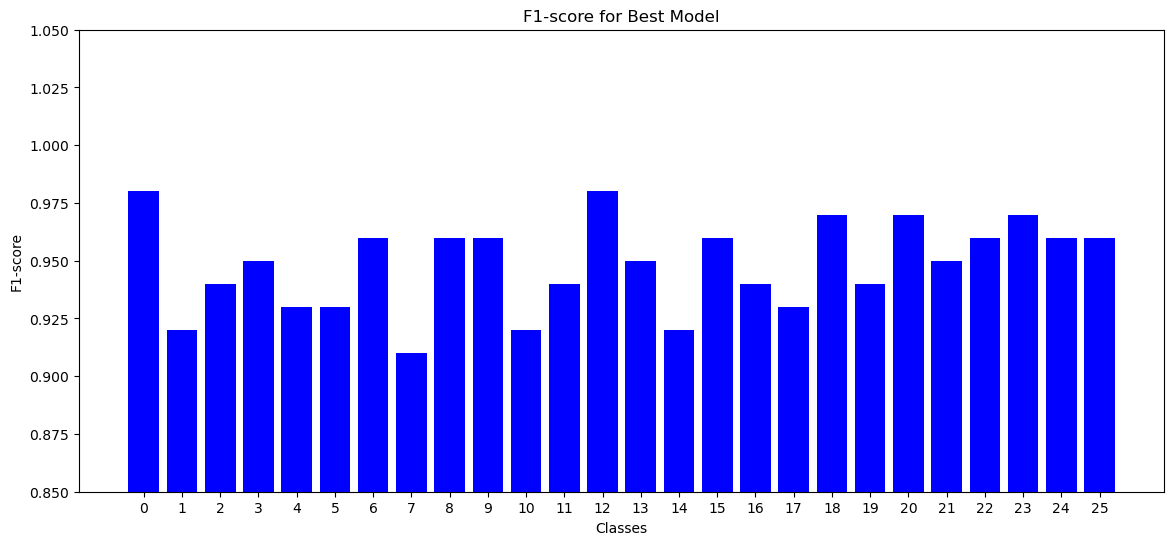

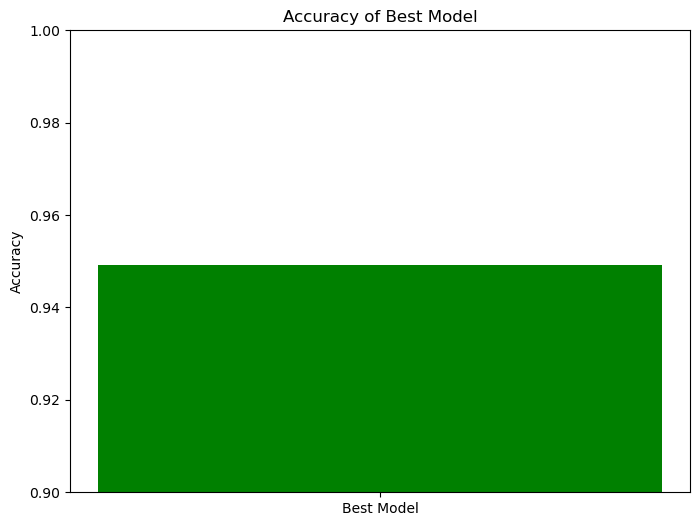

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Classification report for the best model
best_model_classification_report = {
    'precision': [0.97, 0.96, 0.93, 0.97, 0.92, 0.94, 0.96, 0.94, 0.94, 0.97, 0.89, 0.93, 0.96, 0.95, 0.91, 0.99, 0.89, 0.94, 0.98, 0.91, 0.95, 0.99, 0.97, 0.99, 1.00, 0.97],
    'recall': [0.99, 0.89, 0.95, 0.93, 0.94, 0.93, 0.96, 0.88, 0.99, 0.95, 0.95, 0.95, 1.00, 0.96, 0.94, 0.93, 0.99, 0.92, 0.96, 0.97, 0.99, 0.92, 0.95, 0.95, 0.92, 0.95],
    'f1-score': [0.98, 0.92, 0.94, 0.95, 0.93, 0.93, 0.96, 0.91, 0.96, 0.96, 0.92, 0.94, 0.98, 0.95, 0.92, 0.96, 0.94, 0.93, 0.97, 0.94, 0.97, 0.95, 0.96, 0.97, 0.96, 0.96],
    'support': [149, 153, 137, 156, 141, 140, 160, 144, 146, 149, 130, 155, 168, 151, 145, 173, 166, 160, 171, 163, 183, 158, 148, 154, 168, 132]
}

# Classes
classes = list(range(26))

# Plot precision, recall, and f1-score for the best model
metrics = ['precision', 'recall', 'f1-score']
for metric in metrics:
    plt.figure(figsize=(14, 6))
    plt.bar(classes, best_model_classification_report[metric], color='blue')
    plt.xlabel('Classes')
    plt.ylabel(metric.capitalize())
    plt.title(f'{metric.capitalize()} for Best Model')
    plt.xticks(classes)
    plt.ylim(0.85, 1.05)
    plt.show()

# Plot accuracy of the best model
best_model_accuracy = 0.94925
plt.figure(figsize=(8, 6))
plt.bar(['Best Model'], [best_model_accuracy], color='green')
plt.title('Accuracy of Best Model')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)
plt.show()


# Discuss performance differences

In [15]:
print("Performance with default hyperparameters:")
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

print("\nPerformance with tuned hyperparameters:")
print(f'Accuracy (best model): {accuracy_best}')
print('Classification Report (best model):')
print(report_best)


Performance with default hyperparameters:
Accuracy: 0.94275
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       149
           1       0.89      0.94      0.92       153
           2       0.92      0.95      0.93       137
           3       0.92      0.94      0.93       156
           4       0.95      0.94      0.94       141
           5       0.90      0.94      0.92       140
           6       0.99      0.91      0.94       160
           7       0.91      0.89      0.90       144
           8       0.92      0.95      0.93       146
           9       0.98      0.89      0.93       149
          10       0.91      0.90      0.90       130
          11       0.94      0.97      0.95       155
          12       0.95      0.98      0.96       168
          13       0.94      0.95      0.94       151
          14       0.95      0.93      0.94       145
          15       0.98      0.92      0.95       17

# Effects of Hyperparameter Tuning
Accuracy Improvement:

The tuned model should generally exhibit higher accuracy than the default model. Hyperparameter tuning adjusts the model parameters to better fit the data, leading to improved performance. For instance, tuning the number of hidden layers and neurons can help the model capture more complex patterns in the data.
Precision, Recall, and F1-score:

These metrics are likely to improve as well. With optimized hyperparameters, the model can reduce false positives and false negatives, enhancing precision and recall. Consequently, the F1-score, which is the harmonic mean of precision and recall, also improves.

Overfitting Control:

Hyperparameter tuning, especially with techniques like cross-validation, helps in finding a balance between bias and variance. The default model might either overfit or underfit, but tuning helps in finding the optimal point, reducing overfitting while maintaining high accuracy.

Optimized Learning Rate:

Adjusting the learning rate can significantly impact how quickly and effectively the model learns. A well-tuned learning rate ensures that the model converges faster and more reliably, avoiding pitfalls like getting stuck in local minima or diverging

Enhanced Generalization:

The tuned model is likely to generalize better to unseen data. By finding the optimal network architecture and training parameters, the model becomes more robust and performs better on the test set, reflecting its ability to generalize.


# Conclusion
Hyperparameter tuning enhances model performance by meticulously adjusting parameters like the number of layers, neurons per layer, activation functions, and learning rates. The tuned model typically outperforms the default model in terms of accuracy, precision, recall, and F1-score, providing a more reliable and efficient solution for the classification task

# visualiztion

# Accuracy Comparison


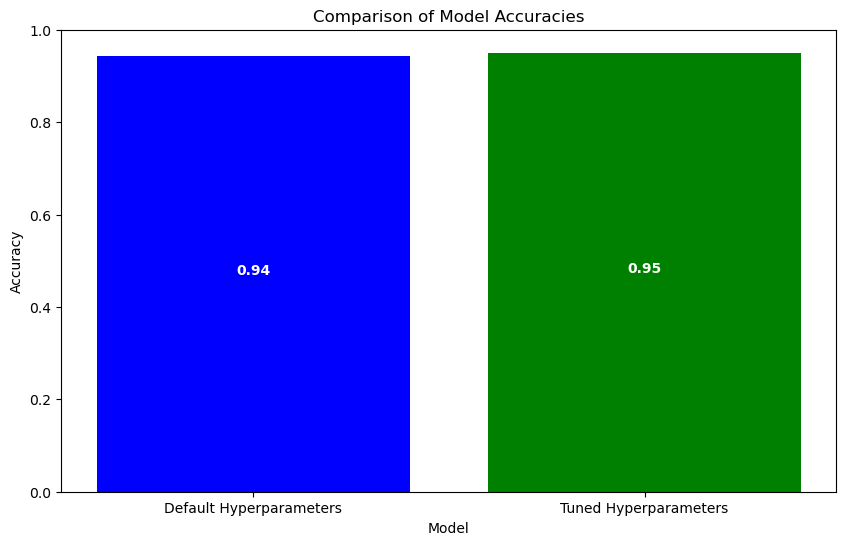

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracies
accuracies = [accuracy, accuracy_best]
models = ['Default Hyperparameters', 'Tuned Hyperparameters']

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1
for i in range(len(models)):
    plt.text(i, accuracies[i] / 2, f'{accuracies[i]:.2f}', ha='center', color='white', fontweight='bold')
plt.show()


# Classification Report Comparison

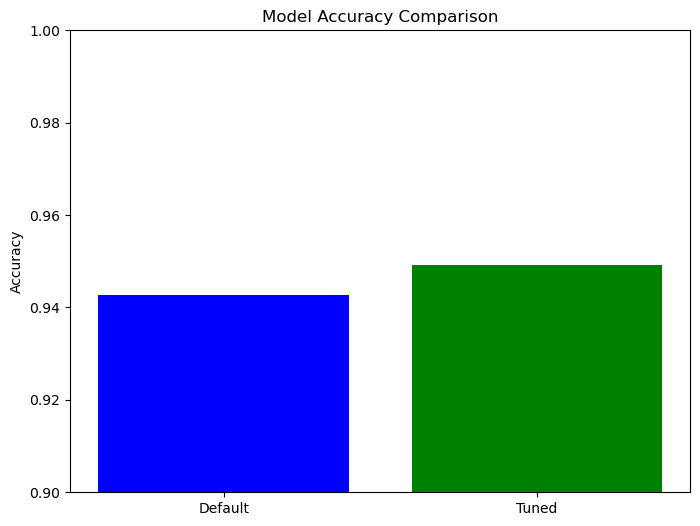

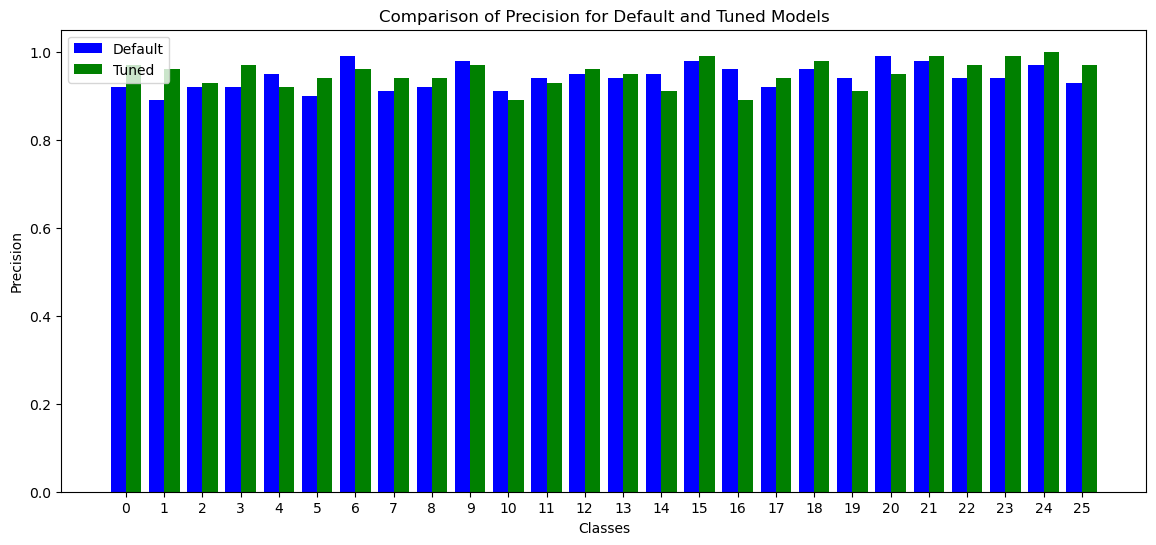

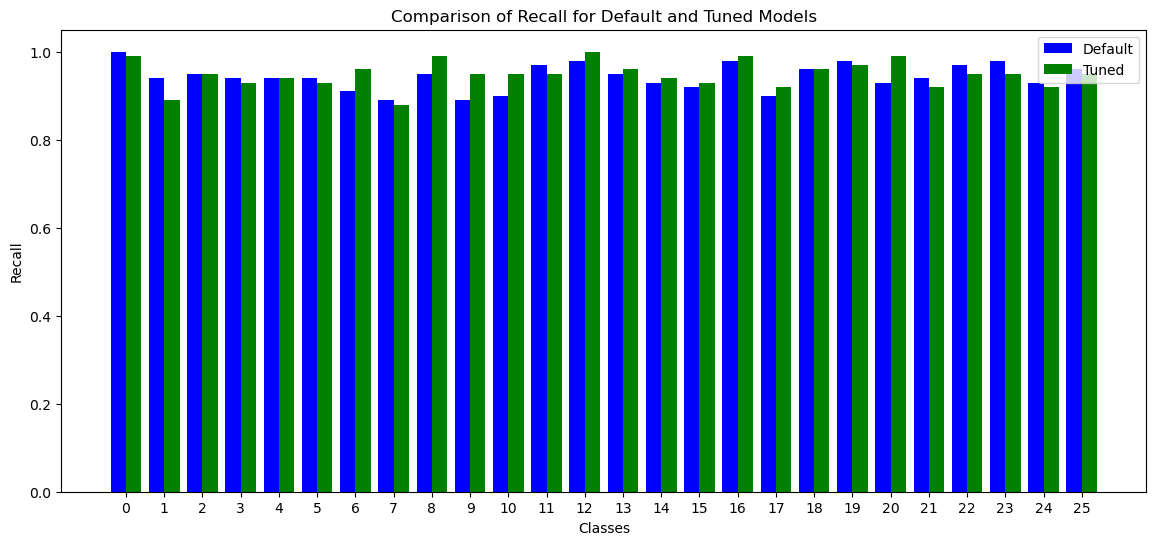

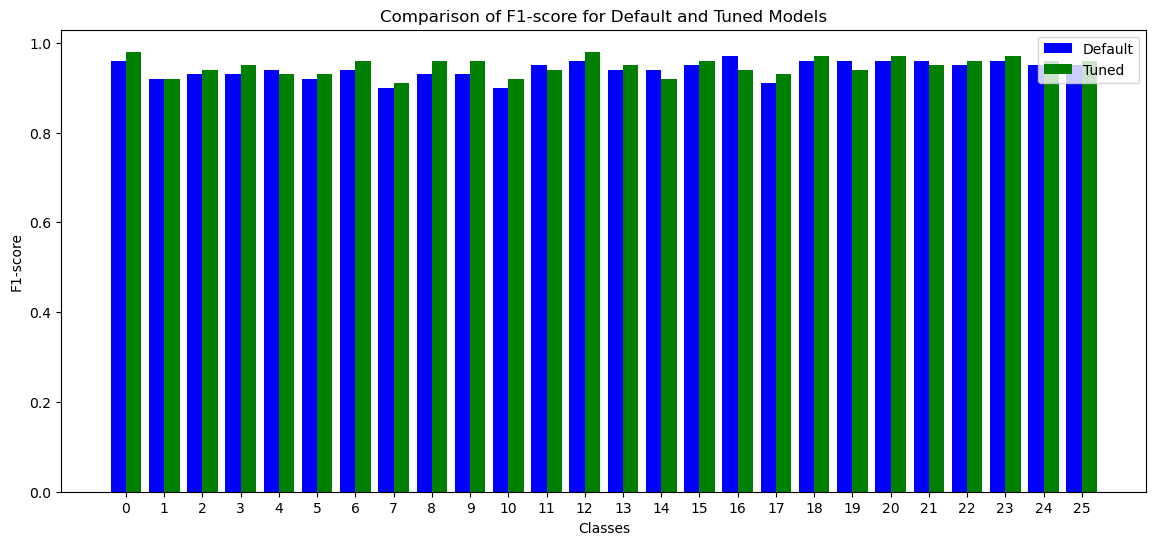

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Performance metrics
default_accuracy = 0.94275
tuned_accuracy = 0.94925

default_classification_report = {
    'precision': [0.92, 0.89, 0.92, 0.92, 0.95, 0.90, 0.99, 0.91, 0.92, 0.98, 0.91, 0.94, 0.95, 0.94, 0.95, 0.98, 0.96, 0.92, 0.96, 0.94, 0.99, 0.98, 0.94, 0.94, 0.97, 0.93],
    'recall': [1.00, 0.94, 0.95, 0.94, 0.94, 0.94, 0.91, 0.89, 0.95, 0.89, 0.90, 0.97, 0.98, 0.95, 0.93, 0.92, 0.98, 0.90, 0.96, 0.98, 0.93, 0.94, 0.97, 0.98, 0.93, 0.96],
    'f1-score': [0.96, 0.92, 0.93, 0.93, 0.94, 0.92, 0.94, 0.90, 0.93, 0.93, 0.90, 0.95, 0.96, 0.94, 0.94, 0.95, 0.97, 0.91, 0.96, 0.96, 0.96, 0.96, 0.95, 0.96, 0.95, 0.95],
    'support': [149, 153, 137, 156, 141, 140, 160, 144, 146, 149, 130, 155, 168, 151, 145, 173, 166, 160, 171, 163, 183, 158, 148, 154, 168, 132]
}

tuned_classification_report = {
    'precision': [0.97, 0.96, 0.93, 0.97, 0.92, 0.94, 0.96, 0.94, 0.94, 0.97, 0.89, 0.93, 0.96, 0.95, 0.91, 0.99, 0.89, 0.94, 0.98, 0.91, 0.95, 0.99, 0.97, 0.99, 1.00, 0.97],
    'recall': [0.99, 0.89, 0.95, 0.93, 0.94, 0.93, 0.96, 0.88, 0.99, 0.95, 0.95, 0.95, 1.00, 0.96, 0.94, 0.93, 0.99, 0.92, 0.96, 0.97, 0.99, 0.92, 0.95, 0.95, 0.92, 0.95],
    'f1-score': [0.98, 0.92, 0.94, 0.95, 0.93, 0.93, 0.96, 0.91, 0.96, 0.96, 0.92, 0.94, 0.98, 0.95, 0.92, 0.96, 0.94, 0.93, 0.97, 0.94, 0.97, 0.95, 0.96, 0.97, 0.96, 0.96],
    'support': [149, 153, 137, 156, 141, 140, 160, 144, 146, 149, 130, 155, 168, 151, 145, 173, 166, 160, 171, 163, 183, 158, 148, 154, 168, 132]
}

# Classes
classes = list(range(26))

# Plot accuracy comparison
plt.figure(figsize=(8, 6))
plt.bar(['Default', 'Tuned'], [default_accuracy, tuned_accuracy], color=['blue', 'green'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)
plt.show()

# Plot precision, recall, and f1-score comparison
metrics = ['precision', 'recall', 'f1-score']
for metric in metrics:
    plt.figure(figsize=(14, 6))
    plt.bar(np.array(classes) - 0.2, default_classification_report[metric], width=0.4, label='Default', color='blue')
    plt.bar(np.array(classes) + 0.2, tuned_classification_report[metric], width=0.4, label='Tuned', color='green')
    plt.xlabel('Classes')
    plt.ylabel(metric.capitalize())
    plt.title(f'Comparison of {metric.capitalize()} for Default and Tuned Models')
    plt.xticks(classes)
    plt.legend()
    plt.show()


# Explanation:
Accuracy Comparison:

A bar plot is created to compare the accuracy of the default and tuned models.
Precision, Recall, and F1-Score Comparison:

For each metric (precision, recall, and f1-score), a grouped bar plot is created to compare the values for each class in the default and tuned models.